In [19]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv("../06machine_learning/data/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
data = data[['Survived', 'Pclass','Sex', 'Age','SibSp','Parch','Embarked']]
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [23]:
data['family'] = data['SibSp'] + data['Parch']

In [24]:
data = data.drop(['SibSp','Parch'], axis=1)
data

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0
...,...,...,...,...,...,...
886,0,2,male,27.0,S,0
887,1,1,female,19.0,S,0
888,0,3,female,NaN,S,3
889,1,1,male,26.0,C,0


In [25]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [26]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) #최빈값으로 채워주기

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [28]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [29]:
#!pip install scikit-learn

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [32]:
X_train

,Pclass,Sex,Age,Embarked,family
748,1,male,19.000000,S,1
45,3,male,29.699118,S,0
28,3,female,29.699118,Q,0
633,1,male,29.699118,S,0
403,3,male,28.000000,S,1
...,...,...,...,...,...
476,2,male,34.000000,S,1
190,2,female,32.000000,S,0
736,3,female,48.000000,S,4
462,1,male,47.000000,S,0


# 딥러닝시에도 데이터의 스케일을 맞춰 주는것이 좋다.
* StandardScaler, MinMaxScaler를 주로 사용, 이상값이 많을 경우 RobustScaler를 사용
* 이진분류(0,1): MinMaxScaler
* 연속값예측: StandardScaler

In [35]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns
print(cat_cols, num_cols)

Index(['Sex', 'Embarked'], dtype='object') Index(['Pclass', 'Age', 'family'], dtype='object')


In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [38]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
ohe.fit(X_train[cat_cols])
ohe_X_train = ohe.transform(X_train[cat_cols])
ohe_X_test = ohe.transform(X_test[cat_cols])
ohe_X_train_df = pd. DataFrame(ohe_X_train, columns=ohe.get_feature_names_out(), index= X_train.index)
ohe_X_test_df = pd. DataFrame(ohe_X_test, columns=ohe.get_feature_names_out(), index= X_test.index)

In [40]:
ohe_X_train_df

,Sex_male,Embarked_Q,Embarked_S
748,1.0,0.0,1.0
45,1.0,0.0,1.0
28,0.0,1.0,0.0
633,1.0,0.0,1.0
403,1.0,0.0,1.0
...,...,...,...
476,1.0,0.0,1.0
190,0.0,0.0,1.0
736,0.0,0.0,1.0
462,1.0,0.0,1.0


In [39]:
mms = MinMaxScaler()
mms.fit(X_train[num_cols])
mms_X_train = mms.transform(X_train[num_cols])
mms_X_test = mms.transform(X_test[num_cols])
mms_X_train_df = pd. DataFrame(mms_X_train, columns=X_train[num_cols].columns, index= X_train.index)
mms_X_test_df = pd. DataFrame(mms_X_test, columns=X_test[num_cols].columns, index= X_test.index)
mms_X_train_df

,Pclass,Age,family
748,0.0,0.233476,0.1
45,1.0,0.367921,0.0
28,1.0,0.367921,0.0
633,0.0,0.367921,0.0
403,1.0,0.346569,0.1
...,...,...,...
476,0.5,0.421965,0.1
190,0.5,0.396833,0.0
736,1.0,0.597889,0.4
462,0.0,0.585323,0.0


In [41]:
X_train_df = pd.concat([mms_X_train_df, ohe_X_train_df], axis=1)
X_test_df = pd.concat([mms_X_test_df, ohe_X_test_df], axis=1)

In [42]:
X_train_df

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
748,0.0,0.233476,0.1,1.0,0.0,1.0
45,1.0,0.367921,0.0,1.0,0.0,1.0
28,1.0,0.367921,0.0,0.0,1.0,0.0
633,0.0,0.367921,0.0,1.0,0.0,1.0
403,1.0,0.346569,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...
476,0.5,0.421965,0.1,1.0,0.0,1.0
190,0.5,0.396833,0.0,0.0,0.0,1.0
736,1.0,0.597889,0.4,0.0,0.0,1.0
462,0.0,0.585323,0.0,1.0,0.0,1.0


In [43]:
X_test_df

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
625,0.0,0.761247,0.0,1.0,0.0,1.0
566,1.0,0.233476,0.0,1.0,0.0,1.0
459,1.0,0.367921,0.0,1.0,1.0,0.0
804,1.0,0.334004,0.0,1.0,0.0,1.0
338,1.0,0.560191,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
184,1.0,0.044986,0.2,0.0,0.0,1.0
607,0.0,0.334004,0.0,1.0,0.0,1.0
624,1.0,0.258608,0.0,1.0,0.0,1.0
103,1.0,0.409399,0.0,1.0,0.0,1.0


# Tensorflow Sequential API를 사용한 순차적 모델 생성 및 분석
* Sequential: 인공신경망을 순차적으로 작성할 때 사용
* Dense: 층, 레이어
* 1. 신경망 모델 정의
* 2. 신경망 모델 훈련
* 3. 훈련된 모델로 테스트
* 4. 검증

* 입력층은 반드시 독립변수의수(input_dim)를 정확히 지정
* 신경망 모델의 은닉층은 2~3개 정도로 한다.
* Dense의 노드수는 2의 배수의 지정 2 4 8 16 256
* Dense의 노드는 큰 수에서 작은 수로 줄여나간다.
* 은닉층의 활성화 함수: Relu
* 출력층은 이진분류일 경우 sigmoid, 다중분류일 경우 softmax
* 회귀분석일 경우(종속변수가 연속형(수치형)인 경우) 출력층에 활성화 함수 없이 노드를 1로 지정

In [44]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
X_train_df.shape[1]

6

In [48]:
# 신경망 모델 정의 keras 3.0, tensorflow 2.19 기준
model = Sequential()
model.add(Input(shape=(X_train_df.shape[1],))) #입력층 #콤마(,) 까먹으면 안 됨!!!
model.add(Dense(64, activation='relu')) #은닉층
model.add(Dense(32, activation='relu')) #은닉층
model.add(Dense(16, activation='relu')) #은닉층
model.add(Dense(1, activation='sigmoid')) #출력층, 이진분류이므로 sigmoid

I0000 00:00:1764648380.408728    1326 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


#  모델의 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
  * 이진분류: binary_crossentropy
  * 다중분류: categorical_crossentropy - y가 one-hot encoding
  * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy - y label encoding
  * 연속형데이터(회귀분석): mse
* optimizer: learning_rate
  * adam을 가장 많이 사용
* metrics: 평가지표 accuracy

In [49]:
# 모델의 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련 model.fit(X_train, y_train)
* epochs: 전체 데이터를 한 번 훈련하는 주기, 10-100 사이
* batch_size: 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절(2의 배수) 32, 64로 쪼개서 넣는 것 추천
* validation_data: 검증 데이터로 모델 검증 실시

In [50]:
len(X_train_df)

623

In [51]:
history = model.fit(X_train_df, y_train, epochs=100, 
                    batch_size=16, validation_data=(X_test_df, y_test)) #16번으로 쪼개서 해라 쪼개서 학습

#623개 16개로 쪼개서 한 에폭에 39 훈련한번할때 데이터를 39로 쪼개서 했다는거 
#loss:오차(작은 게 좋은 거임) 

Epoch 1/100


2025-12-02 13:18:27.967799: I external/local_xla/xla/service/service.cc:163] XLA service 0x78f0f0008ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-02 13:18:27.967885: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-12-02 13:18:28.029005: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-02 13:18:28.351645: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


21/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5608 - loss: 0.6720 

I0000 00:00:1764649109.749397    2423 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6276 - loss: 0.6199 - val_accuracy: 0.6604 - val_loss: 0.5694
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7432 - loss: 0.5372 - val_accuracy: 0.7724 - val_loss: 0.5107
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7897 - loss: 0.4841 - val_accuracy: 0.7761 - val_loss: 0.4810
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961 - loss: 0.4606 - val_accuracy: 0.7687 - val_loss: 0.4791
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.4619 - val_accuracy: 0.7687 - val_loss: 0.4642
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8042 - loss: 0.4449 - val_accuracy: 0.8172 - val_loss: 0.4493
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.4404 - val_accuracy: 0.7761 - val_loss: 0.4468
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8106 - loss: 0.4393 - val_accuracy: 0.8172 - val_loss: 0.

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* accuracy와 loss 간의 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [52]:
score = model.evaluate(X_test_df, y_test)
print('test_loss: ', score[0])
print('test accuracy: ', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8134 - loss: 0.4324  
test_loss:  0.43235212564468384
test accuracy:  0.8134328126907349


In [53]:
for i in history.history:
    print(f"{i} ", history.history[i])

accuracy  [0.6276083588600159, 0.7431781888008118, 0.7897271513938904, 0.7961476445198059, 0.7945425510406494, 0.8041733503341675, 0.8041733503341675, 0.8105939030647278, 0.812199056148529, 0.8105939030647278, 0.8089887499809265, 0.8138041496276855, 0.8202247023582458, 0.8089887499809265, 0.812199056148529, 0.8138041496276855, 0.8089887499809265, 0.8025681972503662, 0.8186196088790894, 0.8202247023582458, 0.8250401020050049, 0.8105939030647278, 0.8346709609031677, 0.8250401020050049, 0.8218298554420471, 0.8250401020050049, 0.8250401020050049, 0.8282504081726074, 0.8298555612564087, 0.8202247023582458, 0.8250401020050049, 0.8298555612564087, 0.8298555612564087, 0.8202247023582458, 0.8250401020050049, 0.8282504081726074, 0.8250401020050049, 0.8362760543823242, 0.8346709609031677, 0.8298555612564087, 0.8266452550888062, 0.8218298554420471, 0.8330658078193665, 0.8330658078193665, 0.8362760543823242, 0.8282504081726074, 0.8330658078193665, 0.8298555612564087, 0.8314606547355652, 0.833065807

In [55]:
import matplotlib.pyplot as plt

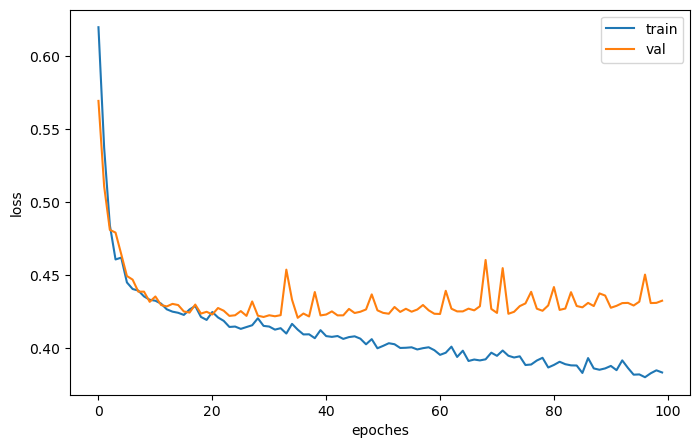

In [56]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()